In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Importing Data

Dataset can be imported to the Notebook or program using the pandas library function 'read_csv(<path>)'

In [2]:
train_df = pd.read_csv('dataset/trainms.csv')
test_df = pd.read_csv('dataset/testms.csv')
target = pd.read_csv('dataset/samplems.csv')
pd.set_option('display.max_columns', None)
train_df.head(3)

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [3]:
target.drop(['s.no'], axis = 1, inplace = True)
test_df = pd.concat([test_df, target], axis = 1)

In [4]:
test_df.head(3)

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,treatment
0,1,2014-08-29 09:29:37,25,Male,United States,PA,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,Don't know,Yes,Somewhat easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN,No
1,2,2014-08-29 09:31:37,42,male,United States,IN,No,Yes,Sometimes,6-25,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,NaN,No
2,3,2014-08-29 09:31:49,34,male,United States,PA,No,Yes,Often,100-500,No,Yes,Yes,Yes,No,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Don't know,No,NaN,Yes


In [5]:
print("Train data dim : ", train_df.shape, "\nTest data dim : ", test_df.shape)

Train data dim :  (1000, 28) 
Test data dim :  (259, 28)


In [6]:
df = pd.concat([train_df, test_df], sort = True)

In [7]:
df.head()

,Age,Country,Gender,Timestamp,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,s.no,seek_help,self_employed,state,supervisor,tech_company,treatment,wellness_program,work_interfere
0,37,United States,Female,2014-08-27 11:29:31,Yes,Yes,Not sure,NaN,Some of them,No,Somewhat easy,No,No,Yes,6-25,No,No,Maybe,No,1,Yes,NaN,IL,Yes,Yes,Yes,No,Often
1,44,United States,M,2014-08-27 11:29:37,Don't know,Don't know,No,NaN,No,No,Don't know,Maybe,No,Don't know,More than 1000,No,No,No,No,2,Don't know,NaN,IN,No,No,No,Don't know,Rarely
2,32,Canada,Male,2014-08-27 11:29:44,Don't know,No,No,NaN,Yes,No,Somewhat difficult,No,Yes,No,6-25,No,No,Yes,No,3,No,NaN,NaN,Yes,Yes,No,No,Rarely
3,31,United Kingdom,Male,2014-08-27 11:29:46,No,No,Yes,NaN,Some of them,Yes,Somewhat difficult,Yes,Maybe,No,26-100,Yes,Yes,Maybe,No,4,No,NaN,NaN,No,Yes,Yes,No,Often
4,31,United States,Male,2014-08-27 11:30:22,Don't know,Yes,No,NaN,Some of them,No,Don't know,No,Yes,Don't know,100-500,No,No,Yes,Yes,5,Don't know,NaN,TX,Yes,Yes,No,Don't know,Never


In [8]:
df.drop( 's.no', inplace = True, axis = 1)
df.head(3)

,Age,Country,Gender,Timestamp,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,state,supervisor,tech_company,treatment,wellness_program,work_interfere
0,37,United States,Female,2014-08-27 11:29:31,Yes,Yes,Not sure,NaN,Some of them,No,Somewhat easy,No,No,Yes,6-25,No,No,Maybe,No,Yes,NaN,IL,Yes,Yes,Yes,No,Often
1,44,United States,M,2014-08-27 11:29:37,Don't know,Don't know,No,NaN,No,No,Don't know,Maybe,No,Don't know,More than 1000,No,No,No,No,Don't know,NaN,IN,No,No,No,Don't know,Rarely
2,32,Canada,Male,2014-08-27 11:29:44,Don't know,No,No,NaN,Yes,No,Somewhat difficult,No,Yes,No,6-25,No,No,Yes,No,No,NaN,NaN,Yes,Yes,No,No,Rarely


# Data Preprocessing

In [9]:
#finding Missing data
null_df = df.isnull()
null_df.head()

,Age,Country,Gender,Timestamp,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,state,supervisor,tech_company,treatment,wellness_program,work_interfere
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [12]:
for col in null_df.columns:
    print(null_df[col].value_counts())
    print("_______________________")

False    1259
Name: Age, dtype: int64
_______________________
False    1259
Name: Country, dtype: int64
_______________________
False    1259
Name: Gender, dtype: int64
_______________________
False    1259
Name: Timestamp, dtype: int64
_______________________
False    1259
Name: anonymity, dtype: int64
_______________________
False    1259
Name: benefits, dtype: int64
_______________________
False    1259
Name: care_options, dtype: int64
_______________________
True     1095
False     164
Name: comments, dtype: int64
_______________________
False    1259
Name: coworkers, dtype: int64
_______________________
False    1259
Name: family_history, dtype: int64
_______________________
False    1259
Name: leave, dtype: int64
_______________________
False    1259
Name: mental_health_consequence, dtype: int64
_______________________
False    1259
Name: mental_health_interview, dtype: int64
_______________________
False    1259
Name: mental_vs_physical, dtype: int64
_______________________
Fals

**From the above list, it is clear that the feature 'state' contain more null values that cannot even filled, since some countries are almost null. So we can drop the column state**

In [14]:
df.drop(columns = ['Timestamp', 'state'], inplace = True)
df.head()

,Age,Country,Gender,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,treatment,wellness_program,work_interfere
0,37,United States,Female,Yes,Yes,Not sure,NaN,Some of them,No,Somewhat easy,No,No,Yes,6-25,No,No,Maybe,No,Yes,NaN,Yes,Yes,Yes,No,Often
1,44,United States,M,Don't know,Don't know,No,NaN,No,No,Don't know,Maybe,No,Don't know,More than 1000,No,No,No,No,Don't know,NaN,No,No,No,Don't know,Rarely
2,32,Canada,Male,Don't know,No,No,NaN,Yes,No,Somewhat difficult,No,Yes,No,6-25,No,No,Yes,No,No,NaN,Yes,Yes,No,No,Rarely
3,31,United Kingdom,Male,No,No,Yes,NaN,Some of them,Yes,Somewhat difficult,Yes,Maybe,No,26-100,Yes,Yes,Maybe,No,No,NaN,No,Yes,Yes,No,Often
4,31,United States,Male,Don't know,Yes,No,NaN,Some of them,No,Don't know,No,Yes,Don't know,100-500,No,No,Yes,Yes,Don't know,NaN,Yes,Yes,No,Don't know,Never


In [15]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [16]:
#since 'No' is most common in train_df['self_employed'], we replace NaN with 'No'. 
df['self_employed'].fillna('No', inplace = True)
train_df.head()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [17]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [18]:
df['work_interfere'].fillna('Sometimes', inplace = True)
df['work_interfere'].value_counts()

Sometimes    729
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [19]:
df.head()

,Age,Country,Gender,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,treatment,wellness_program,work_interfere
0,37,United States,Female,Yes,Yes,Not sure,NaN,Some of them,No,Somewhat easy,No,No,Yes,6-25,No,No,Maybe,No,Yes,No,Yes,Yes,Yes,No,Often
1,44,United States,M,Don't know,Don't know,No,NaN,No,No,Don't know,Maybe,No,Don't know,More than 1000,No,No,No,No,Don't know,No,No,No,No,Don't know,Rarely
2,32,Canada,Male,Don't know,No,No,NaN,Yes,No,Somewhat difficult,No,Yes,No,6-25,No,No,Yes,No,No,No,Yes,Yes,No,No,Rarely
3,31,United Kingdom,Male,No,No,Yes,NaN,Some of them,Yes,Somewhat difficult,Yes,Maybe,No,26-100,Yes,Yes,Maybe,No,No,No,No,Yes,Yes,No,Often
4,31,United States,Male,Don't know,Yes,No,NaN,Some of them,No,Don't know,No,Yes,Don't know,100-500,No,No,Yes,Yes,Don't know,No,Yes,Yes,No,Don't know,Never


In [20]:
def clean_data(result):

    #Gender value cleaning
    #Male
    #dataframe.loc[dataframe['<column>'] == '<value>', '<column>'] = <value>
    result.loc[result['Gender'] == 'M','Gender'] = 'Male'
    result.loc[result['Gender'] == 'male','Gender'] = 'Male'
    result.loc[result['Gender'] == 'Mail','Gender'] = 'Male'
    result.loc[result['Gender'] == 'Mal','Gender'] = 'Male'
    result.loc[result['Gender'] == 'msle','Gender'] = 'Male'
    result.loc[result['Gender'] == 'm','Gender'] = 'Male'
    result.loc[result['Gender'] == 'maile','Gender'] = 'Male'
    result.loc[result['Gender'] == 'mal','Gender'] = 'Male'
    result.loc[result['Gender'] == 'Male-ish','Gender'] = 'Male'
    result.loc[result['Gender'] == 'ostensibly male, unsure what that really means','Gender'] = 'Male'
    result.loc[result['Gender'] == 'Cis Man','Gender'] = 'Male'
    result.loc[result['Gender'] == 'something kinda male?','Gender'] = 'Male'
    result.loc[result['Gender'] == 'make','Gender'] = 'Male'
    result.loc[result['Gender'] == 'Make','Gender'] = 'Male'
    result.loc[result['Gender'] == 'cis Man','Gender'] = 'Male'
    result.loc[result['Gender'] == 'Cis Male','Gender'] = 'Male'
    result.loc[result['Gender'] == 'cis Male','Gender'] = 'Male'
    result.loc[result['Gender'] == 'cis male','Gender'] = 'Male'
    result.loc[result['Gender'] == 'Man','Gender'] = 'Male'
    result.loc[result['Gender'] == 'man','Gender'] = 'Male'
    result.loc[result['Gender'] == 'Malr','Gender'] = 'Male'




    #Female
    result.loc[result['Gender'] == 'F','Gender'] = 'Female'
    result.loc[result['Gender'] == 'female','Gender'] = 'Female'
    result.loc[result['Gender'] == 'f','Gender'] = 'Female'
    result.loc[result['Gender'] == 'Cis Female','Gender'] = 'Female'
    result.loc[result['Gender'] == 'Femake','Gender'] = 'Female'
    result.loc[result['Gender'] == 'cis-female/femme','Gender'] = 'Female'
    result.loc[result['Gender'] == 'Female (cis)','Gender'] = 'Female'
    result.loc[result['Gender'] == 'cis female','Gender'] = 'Female'
    result.loc[result['Gender'] == 'Woman','Gender'] = 'Female'
    result.loc[result['Gender'] == 'woman','Gender'] = 'Female'
    result.loc[result['Gender'] == 'femail','Gender'] = 'Female'
    
    
    #Transgender
    result.loc[result['Gender'] == 'Trans woman','Gender'] = 'Transgender'
    result.loc[result['Gender'] == 'Female (trans)','Gender'] = 'Transgender'
    result.loc[result['Gender'] == 'Female (trans)','Gender'] = 'Transgender'
    result.loc[result['Gender'] == 'Trans-female','Gender'] = 'Transgender'


    #Others
    #result.loc[result['Gender'] == 'non-binary','Gender'] = 'Others'
    result.loc[result['Gender'] == 'Nah','Gender'] = 'Others'
    #result.loc[result['Gender'] == 'Enby','Gender'] = 'Others'
    #result.loc[result['Gender'] == 'fluid','Gender'] = 'Others'
    result.loc[result['Gender'] == 'Genderqueer','Gender'] = 'queer'
    #result.loc[result['Gender'] == 'Androgyne','Gender'] = 'Others'
    #result.loc[result['Gender'] == 'Agender','Gender'] = 'Others'
    result.loc[result['Gender'] == 'Guy (-ish) ^_^','Gender'] = 'Others'
    result.loc[result['Gender'] == 'male leaning androgynous','Gender'] = 'Others'
    #result.loc[result['Gender'] == 'Neuter','Gender'] = 'Others'
    #result.loc[result['Gender'] == 'queer','Gender'] = 'Others'
    result.loc[result['Gender'] == 'A little about you','Gender'] = 'Others'
    result.loc[result['Gender'] == 'p','Gender'] = 'Others'


In [21]:
clean_data(df)
df['Gender'].value_counts()

Male           989
Female         247
Others           5
Male             4
Transgender      4
queer            2
Female           2
Androgyne        1
fluid            1
non-binary       1
Neuter           1
Agender          1
Enby             1
Name: Gender, dtype: int64

# Categorical Data Encoding

In [22]:
data = df

In [23]:
y = data['treatment']
y = pd.DataFrame(y)
data.drop(['treatment'], axis = 1, inplace = True)
data.head()

,Age,Country,Gender,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,wellness_program,work_interfere
0,37,United States,Female,Yes,Yes,Not sure,NaN,Some of them,No,Somewhat easy,No,No,Yes,6-25,No,No,Maybe,No,Yes,No,Yes,Yes,No,Often
1,44,United States,Male,Don't know,Don't know,No,NaN,No,No,Don't know,Maybe,No,Don't know,More than 1000,No,No,No,No,Don't know,No,No,No,Don't know,Rarely
2,32,Canada,Male,Don't know,No,No,NaN,Yes,No,Somewhat difficult,No,Yes,No,6-25,No,No,Yes,No,No,No,Yes,Yes,No,Rarely
3,31,United Kingdom,Male,No,No,Yes,NaN,Some of them,Yes,Somewhat difficult,Yes,Maybe,No,26-100,Yes,Yes,Maybe,No,No,No,No,Yes,No,Often
4,31,United States,Male,Don't know,Yes,No,NaN,Some of them,No,Don't know,No,Yes,Don't know,100-500,No,No,Yes,Yes,Don't know,No,Yes,Yes,Don't know,Never


In [24]:
#Encoding target variable
y.loc[y['treatment'] == 'Yes','treatment'] = 1
y.loc[y['treatment'] == 'No','treatment'] = 0
y.head()

,treatment
0,1
1,0
2,0
3,1
4,0


### 1. Finding and encoding High Cardinality Features.

* High Cardinality means that, features with lots of unique values

In [25]:
data['Country'].unique().shape

(48,)

In [26]:
data['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [27]:
data['Gender'].unique().shape

(13,)

In [28]:
data['Gender'].unique()

array(['Female', 'Male', 'Transgender', 'Male ', 'non-binary', 'Others',
       'Enby', 'fluid', 'queer', 'Female ', 'Androgyne', 'Agender',
       'Neuter'], dtype=object)

* Both features are high cardinality features(k<10k). Hence we cannot apply one-hot encoding since sparse matrix affect the performance of our model.

* The best two options are,
    * Binary Encoding
    * Feature Hashing
    
* Binary encoding is most suitable for Ordinal data. Here 'Country' and 'Gender are nominal data. But its worth trying it too.

* Here I continue with Hash encoding A.K.A Feature Hashing. Hash encoding may results in Collision, but effect of collision is much less on model prediction.

[Referance - Categorical encoding ](https://blog.myyellowroad.com/using-categorical-data-in-machine-learning-with-python-from-dummy-variables-to-deep-category-66041f734512)

[Reference - Hash Ticking](https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087)

In [30]:
#Hahs encoding on features ['Country', 'Gender']
ce_df = ce.TargetEncoder(cols = ['Country', 'Gender'])
data = ce_df.fit_transform(data, y['treatment'])
data.head()

,Age,Country,Gender,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,wellness_program,work_interfere
0,37,0.516644,0.615385,Yes,Yes,Not sure,NaN,Some of them,No,Somewhat easy,No,No,Yes,6-25,No,No,Maybe,No,Yes,No,Yes,Yes,No,Often
1,44,0.516644,0.443883,Don't know,Don't know,No,NaN,No,No,Don't know,Maybe,No,Don't know,More than 1000,No,No,No,No,Don't know,No,No,No,Don't know,Rarely
2,32,0.458333,0.443883,Don't know,No,No,NaN,Yes,No,Somewhat difficult,No,Yes,No,6-25,No,No,Yes,No,No,No,Yes,Yes,No,Rarely
3,31,0.486486,0.443883,No,No,Yes,NaN,Some of them,Yes,Somewhat difficult,Yes,Maybe,No,26-100,Yes,Yes,Maybe,No,No,No,No,Yes,No,Often
4,31,0.516644,0.443883,Don't know,Yes,No,NaN,Some of them,No,Don't know,No,Yes,Don't know,100-500,No,No,Yes,Yes,Don't know,No,Yes,Yes,Don't know,Never


### 2. Encoding Categorical variables with Yes/No values

* The best method to encode categorical variables with values Yes/No is replacing them with 1/0
    * Yes - 1
    * No - 0

In [31]:
features = ['self_employed', 'family_history', 'remote_work', 'tech_company', 'obs_consequence']
data[features]

,self_employed,family_history,remote_work,tech_company,obs_consequence
0,No,No,No,Yes,No
1,No,No,No,No,No
2,No,No,No,Yes,No
3,No,Yes,No,Yes,Yes
4,No,No,Yes,Yes,No
...,...,...,...,...,...
254,No,No,No,Yes,No
255,No,Yes,Yes,Yes,No
256,No,Yes,No,Yes,No
257,No,No,Yes,Yes,No


In [32]:
def encodeYesNo(feature):
    data.loc[data[feature] == 'Yes', feature] = 1
    data.loc[data[feature] == 'No', feature ] = 0

In [33]:
for feature in features:
    encodeYesNo(feature)
    
data[features].head()

,self_employed,family_history,remote_work,tech_company,obs_consequence
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,1,0
3,0,1,0,1,1
4,0,0,1,1,0


In [34]:
data.head()

,Age,Country,Gender,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,wellness_program,work_interfere
0,37,0.516644,0.615385,Yes,Yes,Not sure,NaN,Some of them,0,Somewhat easy,No,No,Yes,6-25,0,No,Maybe,0,Yes,0,Yes,1,No,Often
1,44,0.516644,0.443883,Don't know,Don't know,No,NaN,No,0,Don't know,Maybe,No,Don't know,More than 1000,0,No,No,0,Don't know,0,No,0,Don't know,Rarely
2,32,0.458333,0.443883,Don't know,No,No,NaN,Yes,0,Somewhat difficult,No,Yes,No,6-25,0,No,Yes,0,No,0,Yes,1,No,Rarely
3,31,0.486486,0.443883,No,No,Yes,NaN,Some of them,1,Somewhat difficult,Yes,Maybe,No,26-100,1,Yes,Maybe,0,No,0,No,1,No,Often
4,31,0.516644,0.443883,Don't know,Yes,No,NaN,Some of them,0,Don't know,No,Yes,Don't know,100-500,0,No,Yes,1,Don't know,0,Yes,1,Don't know,Never


### 3. Encoding Features that are close to Ordinal values.

* some of the features are vary close to ordinal values, that is they possess some order. In this type of values, Ordinal encoding is a good choice.

In [35]:
data['leave'].value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In [36]:
ordinal_features = ['work_interfere', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical']
ce_ord = ce.OrdinalEncoder(cols = ordinal_features)
data = ce_ord.fit_transform(data)
data.head()

,Age,Country,Gender,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,wellness_program,work_interfere
0,37,0.516644,0.615385,1,1,1,NaN,1,0,1,1,1,1,6-25,0,1,1,0,1,0,1,1,1,1
1,44,0.516644,0.443883,2,2,2,NaN,2,0,2,2,1,2,More than 1000,0,1,2,0,2,0,2,0,2,2
2,32,0.458333,0.443883,2,3,2,NaN,3,0,3,1,2,3,6-25,0,1,3,0,3,0,1,1,1,2
3,31,0.486486,0.443883,3,3,3,NaN,1,1,3,3,3,3,26-100,1,2,1,0,3,0,2,1,1,1
4,31,0.516644,0.443883,2,1,2,NaN,1,0,2,1,2,2,100-500,0,1,3,1,2,0,1,1,2,3


### 4.Encoding Interval type categorical values.

* one of the good approch for interval type values are split them into lower and upper values.

In [37]:
data['no_employees'].value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

In [38]:
data.loc[data['no_employees'] == 'More than 1000', 'no_employees'] = '1000-100000'
data.head()

,Age,Country,Gender,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,no_employees,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,wellness_program,work_interfere
0,37,0.516644,0.615385,1,1,1,NaN,1,0,1,1,1,1,6-25,0,1,1,0,1,0,1,1,1,1
1,44,0.516644,0.443883,2,2,2,NaN,2,0,2,2,1,2,1000-100000,0,1,2,0,2,0,2,0,2,2
2,32,0.458333,0.443883,2,3,2,NaN,3,0,3,1,2,3,6-25,0,1,3,0,3,0,1,1,1,2
3,31,0.486486,0.443883,3,3,3,NaN,1,1,3,3,3,3,26-100,1,2,1,0,3,0,2,1,1,1
4,31,0.516644,0.443883,2,1,2,NaN,1,0,2,1,2,2,100-500,0,1,3,1,2,0,1,1,2,3


In [39]:
lower = []
upper = []
for val in data['no_employees']:
    values = val.split('-')
    lower.append(int(values[0]))
    upper.append(int(values[1]))

In [40]:
data['no_employees_lower'] = lower
data['no_employees_upper'] = upper
data[['no_employees', 'no_employees_lower', 'no_employees_upper']].head()

,no_employees,no_employees_lower,no_employees_upper
0,6-25,6,25
1,1000-100000,1000,100000
2,6-25,6,25
3,26-100,26,100
4,100-500,100,500


In [41]:
data.drop('no_employees', axis = 1, inplace = True)
data.head()

,Age,Country,Gender,anonymity,benefits,care_options,comments,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,wellness_program,work_interfere,no_employees_lower,no_employees_upper
0,37,0.516644,0.615385,1,1,1,NaN,1,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,6,25
1,44,0.516644,0.443883,2,2,2,NaN,2,0,2,2,1,2,0,1,2,0,2,0,2,0,2,2,1000,100000
2,32,0.458333,0.443883,2,3,2,NaN,3,0,3,1,2,3,0,1,3,0,3,0,1,1,1,2,6,25
3,31,0.486486,0.443883,3,3,3,NaN,1,1,3,3,3,3,1,2,1,0,3,0,2,1,1,1,26,100
4,31,0.516644,0.443883,2,1,2,NaN,1,0,2,1,2,2,0,1,3,1,2,0,1,1,2,3,100,500


### 5. Scaling numerical Variables

* scaling numerical variables using min-max scaler function

In [42]:
data.drop(['comments'], axis = 1, inplace = True)

#### Data distribution before scalling

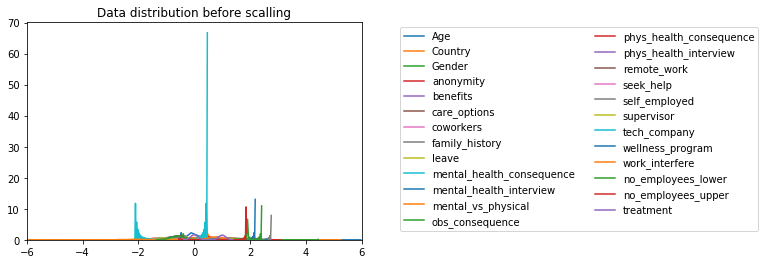

In [137]:
plt.title("Data distribution before scalling")
plt.xlim(-6, 6)

for col in data.columns:
    sns.kdeplot(data[col],)

plt.legend(bbox_to_anchor=(2.2, 1), ncol=2)

In [44]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns = data.columns)
data.head()

,Age,Country,Gender,anonymity,benefits,care_options,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,mental_vs_physical,obs_consequence,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,wellness_program,work_interfere,no_employees_lower,no_employees_upper
0,0.122236,0.410184,1.917006,-1.402490,-1.122383,-1.434613,-0.726026,-0.800912,-1.141617,-1.091246,-0.486002,-1.354468,-0.413718,-0.583229,-0.992534,-0.65255,-1.679318,-0.362184,-1.060247,0.470260,-0.655030,-2.082949,-0.648225,-0.541191
1,0.260012,0.410184,-0.504565,0.458137,0.100005,-0.134269,0.561392,-0.800912,-0.398060,0.203644,-0.486002,0.003235,-0.413718,-0.583229,0.389767,-0.65255,-0.401819,-0.362184,0.161026,-2.126483,0.621568,-1.141659,1.799171,1.861296
2,0.023825,-0.371898,-0.504565,0.458137,1.322392,-0.134269,1.848810,-0.800912,0.345497,-1.091246,0.849974,1.360938,-0.413718,-0.583229,1.772069,-0.65255,0.875681,-0.362184,-1.060247,0.470260,-0.655030,-1.141659,-0.648225,-0.541191
3,0.004143,0.005698,-0.504565,2.318764,1.322392,1.166075,-0.726026,1.248576,0.345497,1.498535,2.185950,1.360938,2.417104,0.626466,-0.992534,-0.65255,0.875681,-0.362184,0.161026,0.470260,-0.655030,-2.082949,-0.598982,-0.539388
4,0.004143,0.410184,-0.504565,0.458137,-1.122383,-0.134269,-0.726026,-0.800912,-0.398060,-1.091246,0.849974,0.003235,-0.413718,-0.583229,1.772069,1.53245,-0.401819,-0.362184,-1.060247,0.470260,0.621568,-0.200370,-0.416781,-0.529776


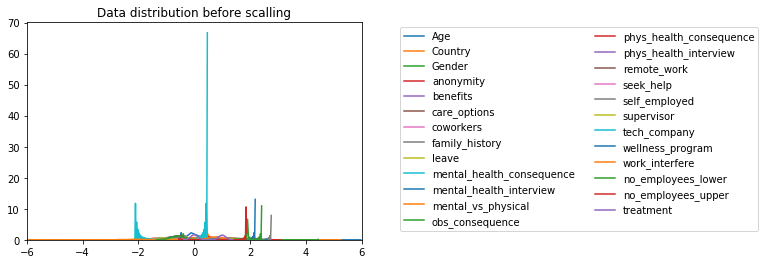

In [138]:
plt.title("Data distribution before scalling")
plt.xlim(-6, 6)

for col in data.columns:
    sns.kdeplot(data[col],)

plt.legend(bbox_to_anchor=(2.2, 1), ncol=2)

In [45]:
X = data

In [46]:
print(X.shape, "\n\n", y.shape)

(1259, 24) 

 (1259, 1)


# Feature Selection

In [77]:
proccessed_data = X
proccessed_data['treatment'] = y['treatment'].values

#### 1. Correlation Matrix with Heatmap

In [98]:
corr = proccessed_data.corr(method = 'pearson')['treatment']
corr

Age                         -0.013429
Country                      0.159799
Gender                       0.142122
anonymity                   -0.078495
benefits                    -0.123076
care_options                 0.166028
coworkers                    0.023920
family_history               0.276240
leave                        0.027238
mental_health_consequence    0.130625
mental_health_interview     -0.080305
mental_vs_physical           0.022545
obs_consequence              0.127292
phys_health_consequence      0.066048
phys_health_interview        0.079444
remote_work                  0.005973
seek_help                   -0.042488
self_employed                0.003024
supervisor                   0.044715
tech_company                -0.033330
wellness_program             0.072130
work_interfere              -0.148444
no_employees_lower           0.050632
no_employees_upper           0.053593
treatment                    1.000000
Name: treatment, dtype: float64

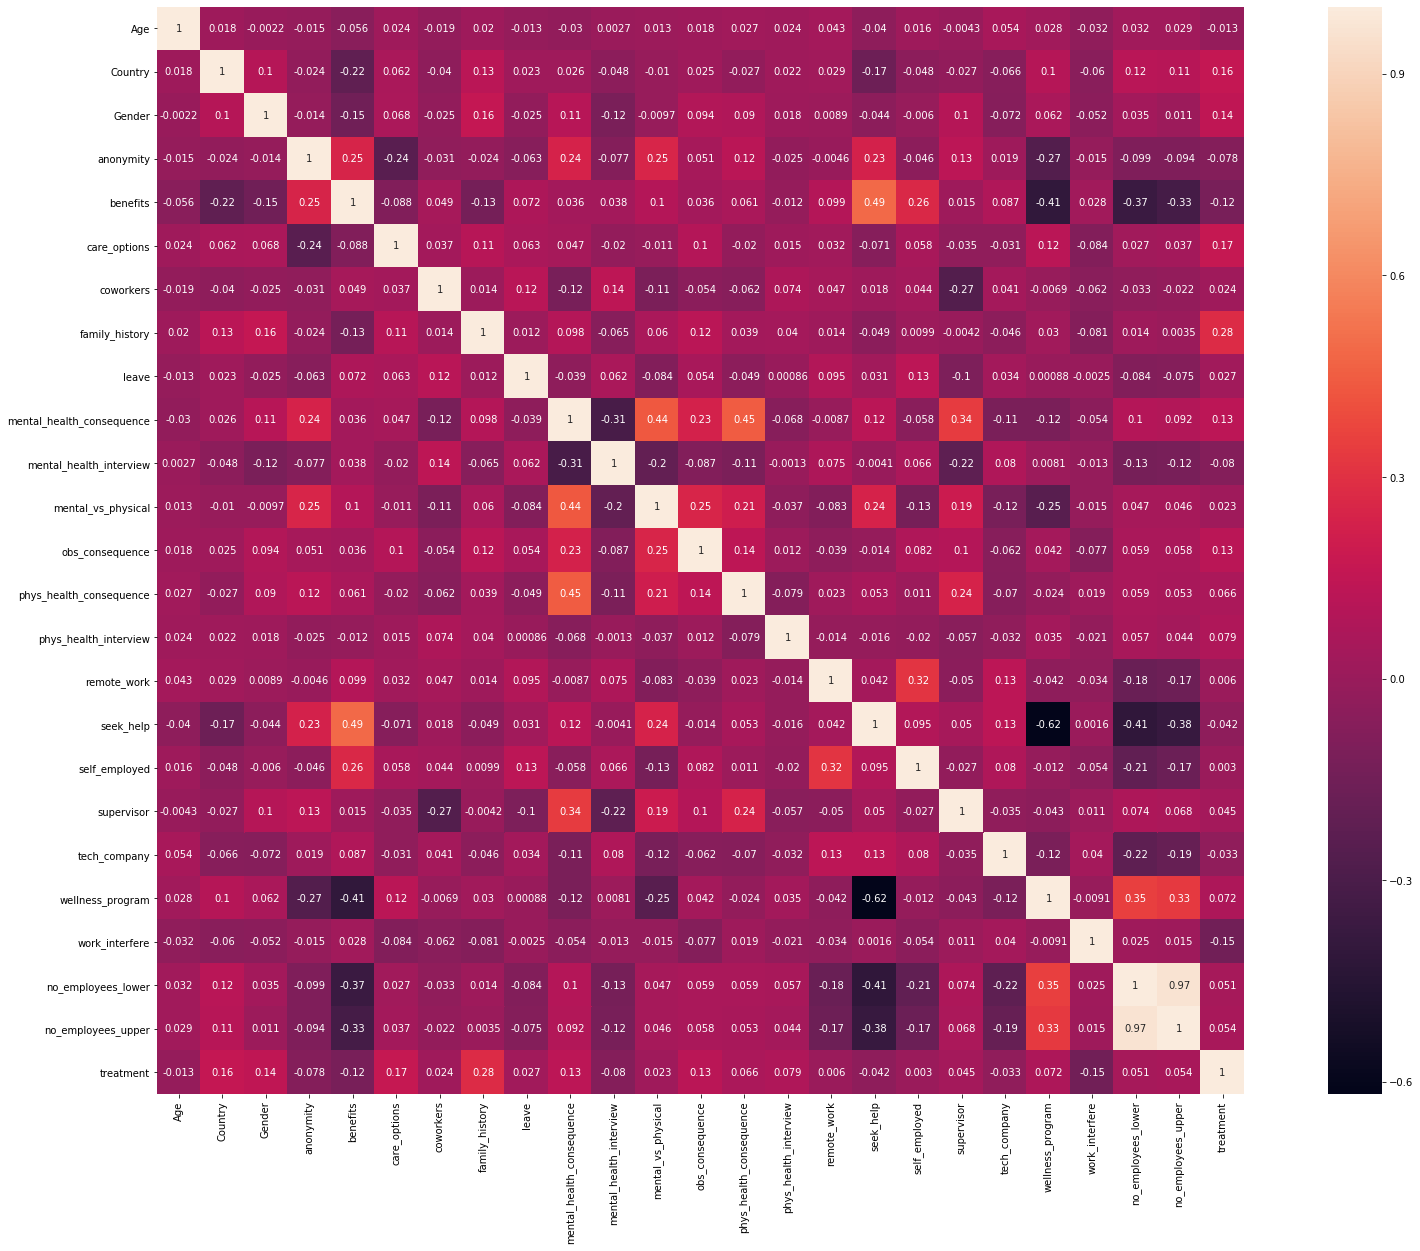

In [85]:
plt.figure(figsize=(30, 20))
sns.heatmap(proccessed_data.corr(method = 'pearson'), annot = proccessed_data.corr(), square = True)

#### 2. Feature Importance using Extra Tree classifier

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

In [89]:
extraTree = ExtraTreesClassifier()
extraTree.fit(X, y)
print(extraTree.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00899393 0.01093932 0.00498736 0.00630902 0.01147327 0.01377272
 0.00641938 0.03925252 0.00476404 0.00941652 0.00182628 0.00648635
 0.00752848 0.00483695 0.00698029 0.00436016 0.00597704 0.00237891
 0.00604916 0.00306037 0.00362524 0.02650486 0.00464837 0.00476094
 0.79464853]


/home/joshyjoy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/joshyjoy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


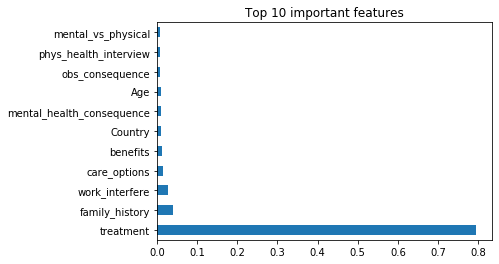

In [161]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(extraTree.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.title("Top 10 important features")
plt.show()

In [248]:
const = np.ones(y.shape)
X.insert(loc = 0, column = 'x0', value = const)

In [329]:
important_features = ['x0', 
                      'phys_health_interview', 
                      'obs_consequence', 
                      'Age', 
                      'mental_health_consequence', 
                      'Country', 
                      'benefits', 
                      'care_options', 
                      'work_interfere', 
                      'family_history']

X[important_features].shape

(1259, 10)

# Model Development

## 1. Machine Learning Models

### A. Logistic Regression

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

In [330]:
x_train, x_test, y_train, y_test = train_test_split( X[important_features], y, test_size=0.205, random_state=42)

In [331]:
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (1000, 10)
y_train :  (1000, 1)
x_test :  (259, 10)
y_test :  (259, 1)


In [332]:
model = LogisticRegression()
model.fit(x_train, y_train)

/home/joshyjoy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/joshyjoy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [333]:
model.score(x_train, y_train)

0.666

In [334]:
yhat = model.predict(x_test)
yhat

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [335]:
confusion_mtx = confusion_matrix(y_test, yhat)
print(confusion_mtx)

[[101  40]
 [ 43  75]]


In [336]:
print("Test Accuracy = ", f1_score(y_test, yhat))

Test Accuracy =  0.6437768240343348


### B. Ridged(L2) and Lasso(L1) model (Regularised Logistic regression Model)

In [82]:
from sklearn.linear_model import Ridge, Lasso 

### C. Naive Bias Classifier

In [191]:
 from sklearn.naive_bayes import GaussianNB

In [275]:
naiveclassifier = GaussianNB()
naiveclassifier.fit(x_train, y_train)

/home/joshyjoy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [276]:
naive_yhat = naiveclassifier.predict(x_test)
naive_yhat

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [277]:
print("Test Accuracy = ", f1_score(y_test, naive_yhat))

Test Accuracy =  0.5963302752293578


## 2. Deep Learning Model

In [180]:
import keras as K
import keras.models as M
from keras.layers import *

In [278]:
classification = K.Sequential()

In [279]:
#neural network structure definition

#first hidden layer
classification.add(Dense(8, input_dim = 16, activation = 'relu', name = "layer_1"))

#second hidden layer
classification.add(Dense(5, activation = 'relu', name = "layer_2"))

#third hidden layer
classification.add(Dense(5, activation = 'relu', name = "layer_3"))

#third hidden layer
classification.add(Dense(5, activation = 'relu', name = "layer_4"))

#output layer
classification.add(Dense(1, activation = 'sigmoid', name = "output_layer"))

In [280]:
#compiling the neural network
classification.compile(optimizer = 'adam', loss='binary_crossentropy', metrics =['accuracy'])


In [281]:
#train the neural network model
classification.fit(x = x_train, y = y_train, epochs = 50)

Epoch 1/50
1000/1000 [==============================] - 1s 801us/step - loss: 0.6933 - acc: 0.5080
Epoch 2/50
1000/1000 [==============================] - 0s 49us/step - loss: 0.6925 - acc: 0.5210
Epoch 3/50
1000/1000 [==============================] - 0s 57us/step - loss: 0.6918 - acc: 0.5460
Epoch 4/50
1000/1000 [==============================] - 0s 59us/step - loss: 0.6911 - acc: 0.5920
Epoch 5/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.6905 - acc: 0.5850
Epoch 6/50
1000/1000 [==============================] - 0s 52us/step - loss: 0.6895 - acc: 0.5960
Epoch 7/50
1000/1000 [==============================] - 0s 50us/step - loss: 0.6884 - acc: 0.5870
Epoch 8/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.6872 - acc: 0.5910
Epoch 9/50
1000/1000 [==============================] - 0s 49us/step - loss: 0.6858 - acc: 0.6000
Epoch 10/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.6839 - acc: 0.6080
Epoch 11/50
1000/1

In [282]:
eval_model=classification.evaluate(x_train, y_train)
eval_model

1000/1000 [==============================] - 0s 284us/step


[0.5526160879135131, 0.738]

In [283]:
y_pred=classification.predict(x_test)
yhat = []
for i in y_pred:
    if i>0.5:
        yhat.append(1)
    else:
        yhat.append(0)
        
yhat = np.asarray(yhat)
yhat

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [284]:
confusion_mtx = confusion_matrix(y_test, yhat)
confusion_mtx

array([[101,  40],
       [ 53,  65]])

In [285]:
f1 = f1_score(y_test, yhat)
print(f1)

0.5829596412556054
